In [6]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

## The subject function and its derivative
$$f(x) = x^4 - 3x^3 + 2$$
$$f'(x) = 4x^3-9x^2

In [7]:
# Define the function to be minimized (with a local and a global minimum)
def f(x):
    return x**4 - 3*x**3 + 2

# Derivative of the function
def df(x):
    return 4*x**3 - 9*x**2

## Find the minimum with various methods

/var/folders/sb/79789zy563v6nhrx5w9xvvtd5cx4x1/T/ipykernel_59781/1953940386.py:66: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  axs[0,0].plot(gd, f(gd), 'ro-', label="Gradient descent path", color='gray', alpha=0.5)
/var/folders/sb/79789zy563v6nhrx5w9xvvtd5cx4x1/T/ipykernel_59781/1953940386.py:70: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  axs[0,1].plot(gd_momentum, f(gd_momentum), 'ro-', label="Gradient Descent Path", color='gray', alpha=0.5)
/var/folders/sb/79789zy563v6nhrx5w9xvvtd5cx4x1/T/ipykernel_59781/1953940386.py:74: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  axs[1,0].plot(gd_decay, f(gd_decay), 'ro-', label="Gradient Descent Path", co

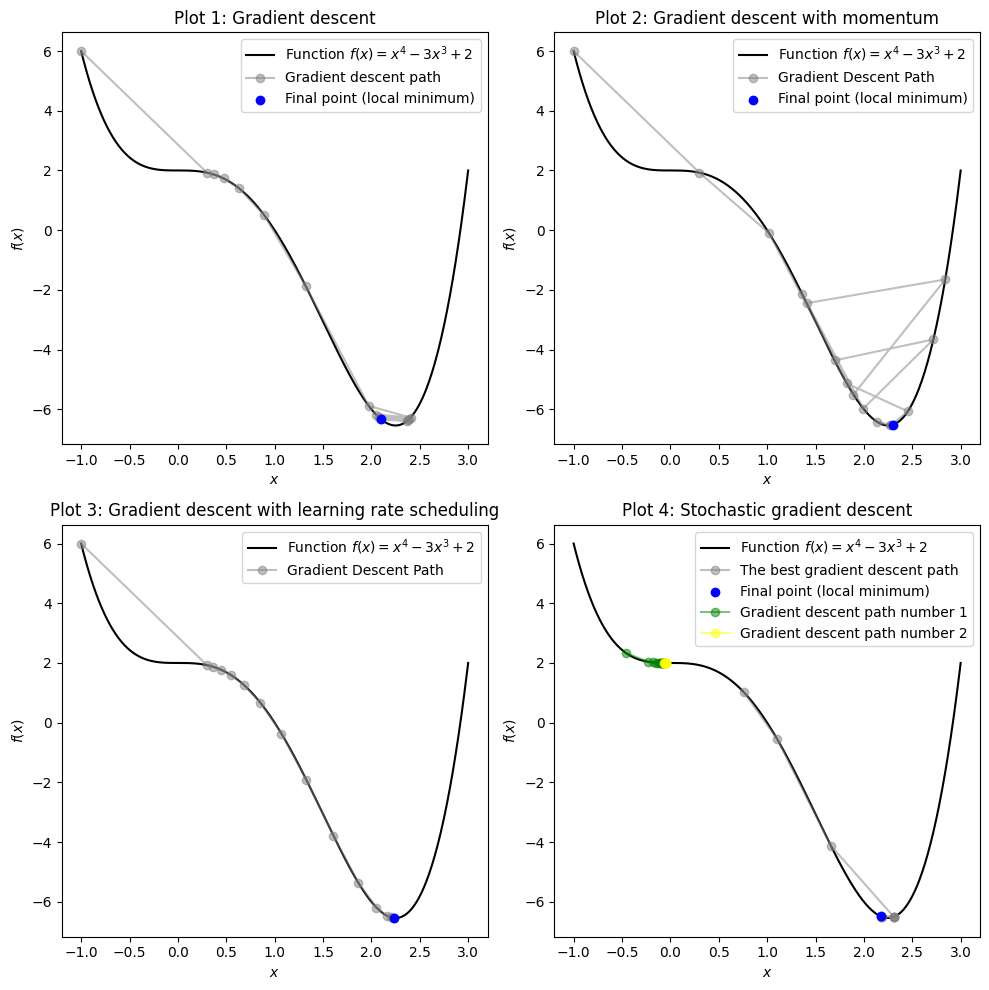

In [10]:
def gradient_descent(starting_point, learning_rate, iterations):
    x = starting_point
    path = [x]
    for _ in range(iterations):
        gradient = df(x)
        x = x - learning_rate * gradient
        path.append(x)
    return np.array(path)

def gradient_descent_with_momentum(starting_point, learning_rate, momentum, iterations):
    x = starting_point
    velocity = 0
    path = [x]
    for _ in range(iterations):
        gradient = df(x)
        velocity = momentum * velocity - learning_rate * gradient
        x = x + velocity
        path.append(x)
    return np.array(path)

def gradient_descent_with_decay(starting_point, initial_lr, decay_rate, iterations):
    x = starting_point
    path = [x]
    learning_rate = initial_lr
    for i in range(iterations):
        gradient = df(x)
        x = x - learning_rate * gradient
        path.append(x)
        learning_rate *= decay_rate
    return np.array(path)

def stochastic_gradient_descent(restarts, learning_rate, iterations):
    best_path = None
    paths = []
    best_min = float('inf')
    for _ in range(restarts):
        starting_point = np.random.uniform(-1, 3)
        path = gradient_descent(starting_point, learning_rate, iterations)
        paths.append(np.array(path))
        if f(path[-1]) < best_min:
            best_min = f(path[-1])
            best_path = path
    paths = [p for p in paths if not np.array_equal(p, best_path)]
    return best_path, paths


# Parameters
starting_point = -1.0
learning_rate = 0.1
iterations = 15

# Perform gradient descent
gd = gradient_descent(starting_point, learning_rate, iterations)
gd_momentum = gradient_descent_with_momentum(starting_point, learning_rate, momentum=0.5, iterations=iterations)
gd_decay = gradient_descent_with_decay(starting_point, learning_rate, decay_rate=0.9, iterations=iterations)
# Path for the minimum SGD and the rest of the paths
min_sgd, rest_sgd = stochastic_gradient_descent(3, learning_rate, 10)

fix, axs = plt.subplots(2,2, figsize=(10,10))
x_vals = np.linspace(-1, 3, 400)
y_vals = f(x_vals)
for el in product((0,1),(0,1)):
    axs[el].plot(x_vals, y_vals, label="Function $f(x) = x^4 - 3x^3 + 2$", color='black')
    axs[el].set_xlabel('$x$')
    axs[el].set_ylabel('$f(x)$')
axs[0,0].plot(gd, f(gd), 'ro-', label="Gradient descent path", color='gray', alpha=0.5)
axs[0,0].scatter(gd[-1], f(gd[-1]), color='blue', zorder=5, label="Final point (local minimum)")
axs[0,0].set_title('Plot 1: Gradient descent')
axs[0,0].legend()
axs[0,1].plot(gd_momentum, f(gd_momentum), 'ro-', label="Gradient Descent Path", color='gray', alpha=0.5)
axs[0,1].set_title('Plot 2: Gradient descent with momentum')
axs[0,1].scatter(gd_momentum[-1], f(gd_momentum[-1]), color='blue', zorder=5, label="Final point (local minimum)")
axs[0,1].legend()
axs[1,0].plot(gd_decay, f(gd_decay), 'ro-', label="Gradient Descent Path", color='gray', alpha=0.5)
axs[1,0].set_title('Plot 3: Gradient descent with learning rate scheduling')
axs[1,0].legend()
axs[1,0].scatter(gd_decay[-1], f(gd_decay[-1]), color='blue', zorder=5, label="Final point (local minimum)")
axs[1,1].plot(min_sgd, f(min_sgd), 'ro-', label="The best gradient descent path", color='gray', alpha=0.5)
axs[1,1].scatter(min_sgd[-1], f(min_sgd[-1]), color='blue', zorder=5, label="Final point (local minimum)")
colors = ['green', 'yellow', 'red']
for i,path in enumerate(rest_sgd):
    axs[1,1].plot(path, f(path), 'ro-', label=f"Gradient descent path number {i+1}", color=colors[i], alpha=0.5)
axs[1,1].set_title('Plot 4: Stochastic gradient descent')
axs[1,1].legend()
plt.tight_layout()
plt.savefig('../charts/gradient_descent_benchmark.eps', format='eps')
plt.show()
